In [1]:
import torch
import torch.nn
from dataset.data import DataLoader


In [2]:
my_loader= DataLoader(dataset_name='CIFAR10', batch_size=128)
train_loader, test_loader = my_loader.get_loader()

Files already downloaded and verified
Files already downloaded and verified


In [3]:
from models.resnet import ResNet18
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

my_model1 = ResNet18(num_class=10).to(device)

summary(my_model1, input_size=(3,32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [4]:
from main.train import TrainModel
from main.eval import TestModel
from torch.optim.lr_scheduler import StepLR 
import torch.optim as optim

EPOCHS = 2

In [5]:
my_model1 = my_model1 = ResNet18(num_class=10).to(device)
optimizer1 = optim.SGD(my_model1.parameters(), lr=0.01, momentum=0.9)
scheduler1 = StepLR(optimizer1, step_size=20, gamma=0.1) 

train_module1 = TrainModel(my_model1, device, train_loader, optimizer1)
test_module1 = TestModel(my_model1, device, test_loader)

In [6]:
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    
    train_module1.train_a(L1_reg=False, l1_lambda=0.0001) # batch norm model with L1 regularization.
    test_module1.eval(epoch, EPOCHS)
    scheduler1.step()
    

EPOCH: 0


Loss=1.1946407556533813 Batch_id=390 Accuracy=43.77: 100%|██████████| 391/391 [01:10<00:00,  5.55it/s]



Test set: Average loss: 1.1896, Accuracy: 5942/10000 (59.42%)

EPOCH: 1


Loss=1.2354204654693604 Batch_id=390 Accuracy=61.14: 100%|██████████| 391/391 [01:07<00:00,  5.79it/s]


generating mis-classified images for epoch 1
generating mis-classified images for epoch 1
generating mis-classified images for epoch 1
generating mis-classified images for epoch 1
generating mis-classified images for epoch 1
generating mis-classified images for epoch 1
generating mis-classified images for epoch 1
generating mis-classified images for epoch 1
generating mis-classified images for epoch 1
generating mis-classified images for epoch 1

Test set: Average loss: 0.9111, Accuracy: 6850/10000 (68.50%)



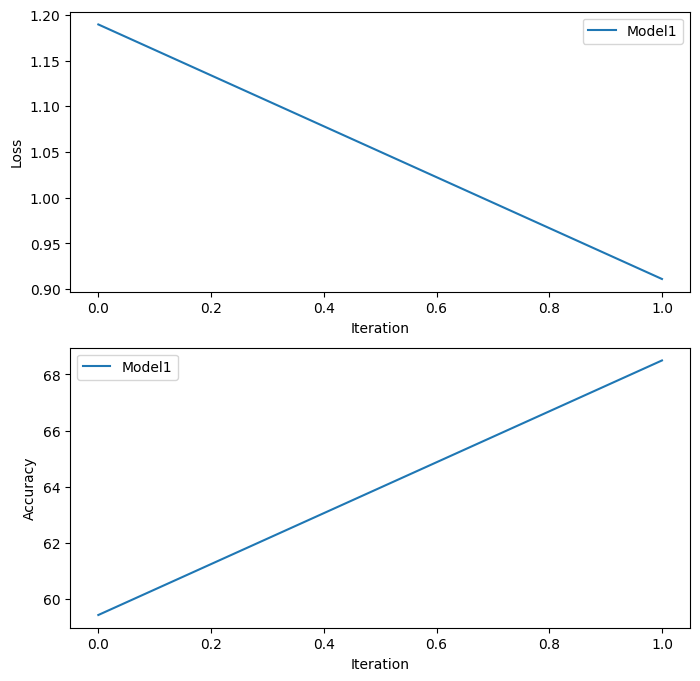

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

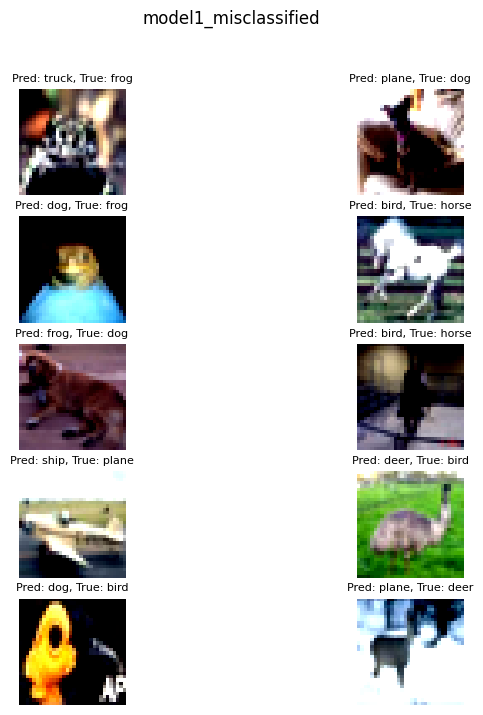

In [7]:
from util.plot_graph import plot_loss_accuracy

plot_loss_accuracy(test_module1)

from util.plot_misclassified import plot_misclassified
plot_misclassified(test_module1.test_misc_img, test_module1.test_misc_label, 'model1_misclassified')

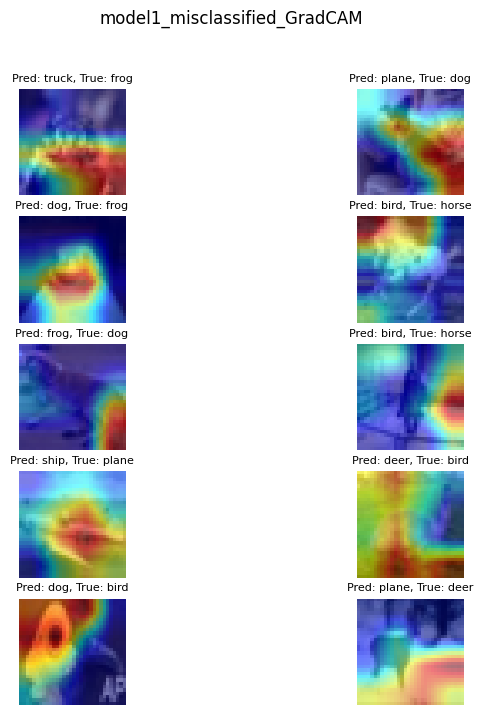

In [8]:
from util.get_gradcam import generate_grad
from util.plot_misclassified import plot_misclassified_grad

gradcam_img_list = generate_grad(test_module1.test_misc_img, my_model1.to('cpu'))

plot_misclassified_grad(gradcam_img_list, test_module1.test_misc_label, 'model1_misclassified_GradCAM')